In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [7]:
data = pd.read_csv('data.csv')
data.head()

,Year,GNDR,ETHCTY,NM,CNT,RNK
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53


In [16]:
# Simulate a binary target variable based on some arbitrary rule for demonstration purposes
# For instance, names with a rank lower than the median could be one class, and those above another
median_rank = data['RNK'].median()
data['Target'] = np.where(data['RNK'] <= median_rank, 0, 1)

# Define features and target
X = data[['CNT', 'RNK']]
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define SVM kernels to use
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []
# Train SVM models using the different kernels and calculate their accuracies
for kernel in kernels:
    # Create SVM model with the current kernel
    svc = SVC(kernel=kernel, gamma='auto')
    # Train the model
    svc.fit(X_train, y_train)
    # Predict on the test set
    y_pred = svc.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Store the model and its accuracy
    print(kernel , "accuray : " , accuracy )
    accuracies.append(accuracy)
    


linear accuray :  1.0
poly accuray :  1.0
rbf accuray :  1.0
sigmoid accuray :  0.5008355216042015


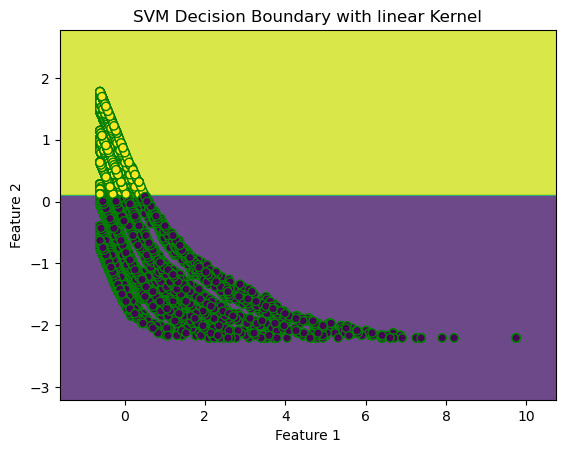

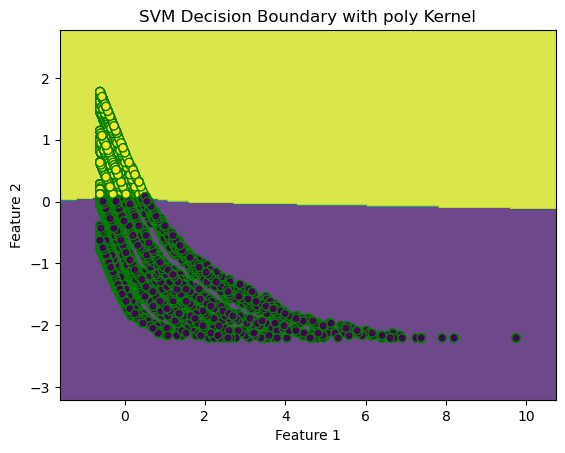

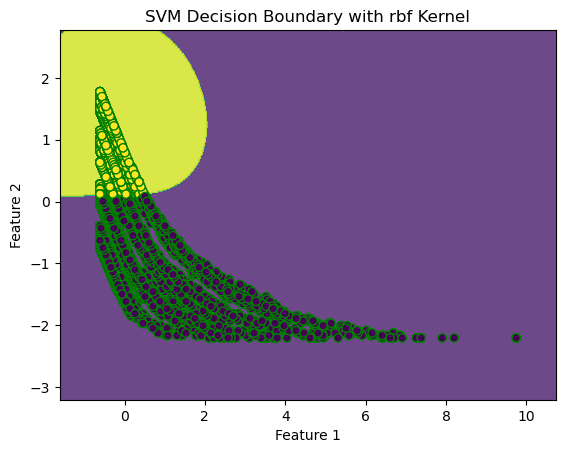

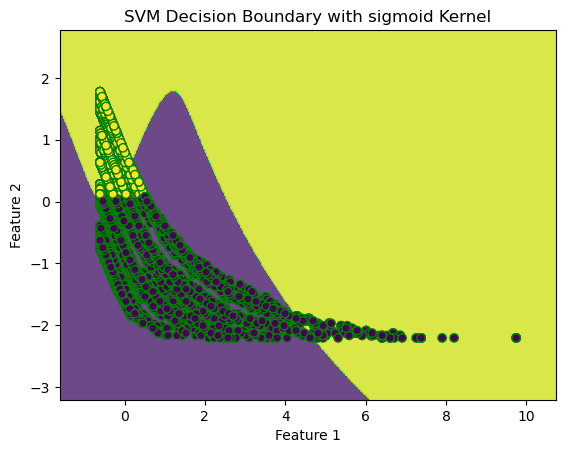

In [13]:
X_scaled = StandardScaler().fit_transform(X)  # Assuming X is your feature set


kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = {kernel: SVC(kernel=kernel).fit(X_scaled, y) for kernel in kernels}  # Assuming y is your target variable



def plot_decision_boundary(model, X, y, kernel):
    # Create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='g')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'SVM Decision Boundary with {kernel} Kernel')
    plt.show()
    
for kernel, model in models.items():
    plot_decision_boundary(model, X_scaled, y, kernel)

In [17]:
best_kernel_index = np.argmax(accuracies)
best_kernel, best_accuracy = kernels[best_kernel_index], accuracies[best_kernel_index]

best_kernel, best_accuracy

('linear', 1.0)